## Lab Assignment 2 - GG3209 
### Student ID - 220005413


#### **Part 1: Python Basics**

**Task 1: Create an If...Else statement that will test if a number is divisible by three**

Use if ... else. % means remainder when divided. Remainder should = 0 when divided by 3. 

In [14]:
x = 8
if x%3 == 0: 
    print(str(x) + " is divisible by three")
else: 
    print(str(x) + " is not divisible by three")

8 is not divisible by three


**Task 2: Create an If...Else statement that will test whether a type of fruit is in a list of acceptable fruits**

Create list of acceptable fruits. Use if ... else statement.

In [19]:
fruits = ["apple", "orange", "pear", "kiwi", "strawberry"]
y = "pineapple"
if y in fruits:
    print(str(y) + " is acceptable")
else:
    print(str(y) + " is not acceptable")


pineapple is not acceptable


**Task 3: Create a function to calculate the distance between two coordinates using the haversine formula**

Define the function to return the distance when you input two coordinates.

In [13]:
import math

def haversine(latA, lonA, latB, lonB):
    latA, lonA = locationA
    latB, lonB = locationB
    
    latA = math.radians(latA)
    lonA = math.radians(lonA)
    latB = math.radians(latB)
    lonB = math.radians(lonB)
    
    # Haversine formula
    a = math.sin((latB - latA) / 2)**2 + math.cos(latA) * math.cos(latB) * math.sin((lonB - lonA) / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    # Mean radius of the Earth (Km)
    R = 6371
    
    distance = R * c
    return distance

#Example: Calculate distance St Andrews to Melbourne
locationA = [56.33871, -2.79902] #coordinates of St Andrews
locationB = [-37.840935, 144.946457] #coordinates of Melbourne

distance = haversine(latA, lonA, latB, lonB)
print(distance)

16872.455399813356


#### **Part 2: Pandas and Numpy**

In [7]:
import numpy as np
import pandas as pd

Uploading the dataset

In [3]:
trees_df = pd.read_csv('/arcgis/home/portland_park_trees.csv', sep=",", header=0, encoding="ISO-8859-1")
trees_df.head(4)

fid  OBJECTID  Inventory_ Species   DBH Condition  TreeHeight  CrownWidth  \
0    1       426  2017/05/09    PSME  37.4      Fair       105.0        44.0   
1    2       427  2017/05/09    PSME  32.5      Fair        94.0        49.0   
2    3       428  2017/05/09    CRLA   9.7      Fair        23.0        28.0   
3    4       429  2017/05/09    QURU  10.3      Poor        28.0        38.0   

   CrownWid_1 CollectedB  ...        Genus        Common_nam  \
0        57.0      staff  ...  Pseudotsuga       Douglas-fir   
1        45.0      staff  ...  Pseudotsuga       Douglas-fir   
2        27.0      staff  ...    Crataegus  Lavalle hawthorn   
3        31.0      staff  ...      Quercus  northern red oak   

              Genus_spec Functional Size Native Edible Nuisance  \
0  Pseudotsuga menziesii         CE    L    Yes    NaN      NaN   
1  Pseudotsuga menziesii         CE    L    Yes    NaN      NaN   
2  Crataegus x lavalleei         BD    S     No    NaN      NaN   
3          Quercus rubra         BD    L     No    NaN      NaN   

                                              Origin  \
0  North America - from British Columbia south to...   
1  North America - from British Columbia south to...   
2  North America - a hybrid between a Mexican and...   
3  North America - eastern Canada and eastern USA...   

                                          Species_fa  
0  Bracts on cones look like a mouse's feet and t...  
1  Bracts on cones look like a mouse's feet and t...  
2  Like most hawthorns, the tree has stout thorns...  
3  Acorns take two years to mature and are an imp...  

[4 rows x 40 columns]

**1. How many trees are of the Quercus or Acer genus?**

Separate just the Quercus and Acer genus 

In [50]:
just_quercus_acer = trees_df[(trees_df["Genus"] == "Quercus") + (trees_df["Genus"] == "Acer")]
print(len(just_quercus_acer))

5675


**2. How many trees are of the Quercus or Acer genus and have  DBH larger than 50 inches?**

Add >50 to seperate the larger trees

In [51]:
quercus_acer_large = just_quercus_acer[just_quercus_acer["DBH"]>50]
print(len(quercus_acer_large))

124


**3. Which genus has the highest mean DBH of the following genera: Quercus, Acer or Fraxinus?**

In [4]:
#separating the individual species from the dataset
just_quercus = trees_df[trees_df["Genus"] == "Quercus"] 
just_acer = trees_df[trees_df["Genus"] == "Acer"] 
just_fraxinus = trees_df[trees_df["Genus"] == "Fraxinus"] 

In [47]:
#calculating mean from the separated datasets 
quercus_mean = just_quercus["DBH"].mean()
print(str (quercus_mean) + " is the mean DBH for Quercus")

acer_mean = just_acer["DBH"].mean()
print(str (acer_mean) + " is the mean DBH for Acer")

fraxinus_mean = just_fraxinus["DBH"].mean()
print(str (fraxinus_mean) + " is the mean DBH for Fraxinus")

23.56823839157492 is the mean DBH for Quercus
18.419085331846066 is the mean DBH for Acer
11.033609693877551 is the mean DBH for Fraxinus


Quercus has the highest mean DBH

**4. How many different species of trees are recorded in the Acer genus?**

In [13]:
just_acer["Species"].describe()

count     3586
unique      20
top       ACPL
freq      1502
Name: Species, dtype: object

20 unique species in Acer genus

**5. World Cities dataset**

Upload the world cities dataset

In [4]:
cities_df = pd.read_csv('/arcgis/home/world_cities.csv', sep=",", header=0, encoding="ISO-8859-1")
cities_df.head(4)

city    country    pop    lat    lon  capital
0  'Abasan al-Jadidah  Palestine   5629  31.31  34.34        0
1  'Abasan al-Kabirah  Palestine  18999  31.32  34.35        0
2        'Abdul Hakim   Pakistan  47788  30.55  72.11        0
3  'Abdullah-as-Salam     Kuwait  21817  29.36  47.98        0

In [4]:
cities_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43645 entries, 0 to 43644
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   city     43645 non-null  object 
 1   country  43645 non-null  object 
 2   pop      43645 non-null  int64  
 3   lat      43645 non-null  float64
 4   lon      43645 non-null  float64
 5   capital  43645 non-null  int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 2.0+ MB


5.1  Calculate a new column named "pop_M" (population in millions), by transforming the 
"pop" (population) column

In [5]:
cities_df["pop_M"] = pd.Series(cities_df["pop"]/ 1000000)
cities_df.head(4)

city    country    pop    lat    lon  capital     pop_M
0  'Abasan al-Jadidah  Palestine   5629  31.31  34.34        0  0.005629
1  'Abasan al-Kabirah  Palestine  18999  31.32  34.35        0  0.018999
2        'Abdul Hakim   Pakistan  47788  30.55  72.11        0  0.047788
3  'Abdullah-as-Salam     Kuwait  21817  29.36  47.98        0  0.021817

5.2  Remove the original "pop" column

Use del

In [6]:
del cities_df["pop"]
cities_df.head(4)

city    country    lat    lon  capital     pop_M
0  'Abasan al-Jadidah  Palestine  31.31  34.34        0  0.005629
1  'Abasan al-Kabirah  Palestine  31.32  34.35        0  0.018999
2        'Abdul Hakim   Pakistan  30.55  72.11        0  0.047788
3  'Abdullah-as-Salam     Kuwait  29.36  47.98        0  0.021817

5.3  Choose/subset a city that starts with the same letter as your first name (T)

In [7]:
just_tokyo= cities_df[cities_df["city"]=="Tokyo"]
print(just_tokyo)

        city country    lat     lon  capital    pop_M
38439  Tokyo   Japan  35.67  139.77        1  8.37244


5.4  Subset the five biggest (i.e., largest population sizes) cities from the country where your 
selected city is and print the result

In [9]:
just_japan= cities_df[cities_df["country"]=="Japan"]
just_japan_sort = just_japan.sort_values(by = "pop_M", ascending = False)
print(just_japan_sort.head(5))

           city country    lat     lon  capital     pop_M
38439     Tokyo   Japan  35.67  139.77        1  8.372440
42408  Yokohama   Japan  35.47  139.62        0  3.603710
27432     Osaka   Japan  34.68  135.50        0  2.590815
25184    Nagoya   Japan  35.15  136.91        0  2.194748
33863   Sapporo   Japan  43.06  141.34        0  1.895505


In [10]:
print(just_japan_sort["city"].head(5))

38439       Tokyo
42408    Yokohama
27432       Osaka
25184      Nagoya
33863     Sapporo
Name: city, dtype: object


#### **Part 3: Python Data Visualisation**

In [14]:
import seaborn as sns

In [15]:
trees_df.head(3)

fid  OBJECTID  Inventory_ Species   DBH Condition  TreeHeight  CrownWidth  \
0    1       426  2017/05/09    PSME  37.4      Fair       105.0        44.0   
1    2       427  2017/05/09    PSME  32.5      Fair        94.0        49.0   
2    3       428  2017/05/09    CRLA   9.7      Fair        23.0        28.0   

   CrownWid_1 CollectedB  ...        Genus        Common_nam  \
0        57.0      staff  ...  Pseudotsuga       Douglas-fir   
1        45.0      staff  ...  Pseudotsuga       Douglas-fir   
2        27.0      staff  ...    Crataegus  Lavalle hawthorn   

              Genus_spec Functional Size Native Edible Nuisance  \
0  Pseudotsuga menziesii         CE    L    Yes    NaN      NaN   
1  Pseudotsuga menziesii         CE    L    Yes    NaN      NaN   
2  Crataegus x lavalleei         BD    S     No    NaN      NaN   

                                              Origin  \
0  North America - from British Columbia south to...   
1  North America - from British Columbia south to...   
2  North America - a hybrid between a Mexican and...   

                                          Species_fa  
0  Bracts on cones look like a mouse's feet and t...  
1  Bracts on cones look like a mouse's feet and t...  
2  Like most hawthorns, the tree has stout thorns...  

[3 rows x 40 columns]

**Graph 1: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis 
and tree height mapped to the y-axis** 

In [16]:
just_ulmus = trees_df[trees_df["Genus"]=="Ulmus"]
just_ulmus.head()

fid  OBJECTID  Inventory_ Species   DBH Condition  TreeHeight  CrownWidth  \
57   58       483  2017/05/19    ULPU  40.5      Poor        75.0        65.0   
58   59       484  2017/05/19    ULPU  48.5      Fair        96.0        95.0   
59   60       485  2017/05/19    ULPU  34.0      Fair        74.0        58.0   
60   61       486  2017/05/19    ULPU  35.0      Fair        60.0        57.0   
63   64       489  2017/05/19    ULPU  35.5      Poor        79.0        64.0   

    CrownWid_1 CollectedB  ...  Genus    Common_nam    Genus_spec Functional  \
57        55.0      staff  ...  Ulmus  Siberian elm  Ulmus pumila         BD   
58        84.0      staff  ...  Ulmus  Siberian elm  Ulmus pumila         BD   
59        58.0      staff  ...  Ulmus  Siberian elm  Ulmus pumila         BD   
60        53.0      staff  ...  Ulmus  Siberian elm  Ulmus pumila         BD   
63        48.0      staff  ...  Ulmus  Siberian elm  Ulmus pumila         BD   

   Size Native Edible Nuisance  \
57    L     No    NaN      Yes   
58    L     No    NaN      Yes   
59    L     No    NaN      Yes   
60    L     No    NaN      Yes   
63    L     No    NaN      Yes   

                                               Origin  \
57  Asia - eastern Siberia, Korea, northern China,...   
58  Asia - eastern Siberia, Korea, northern China,...   
59  Asia - eastern Siberia, Korea, northern China,...   
60  Asia - eastern Siberia, Korea, northern China,...   
63  Asia - eastern Siberia, Korea, northern China,...   

                                           Species_fa  
57  Resistant to Dutch elm disease, and cross bred...  
58  Resistant to Dutch elm disease, and cross bred...  
59  Resistant to Dutch elm disease, and cross bred...  
60  Resistant to Dutch elm disease, and cross bred...  
63  Resistant to Dutch elm disease, and cross bred...  

[5 rows x 40 columns]

Use Seaborn scatterplot

<AxesSubplot: xlabel='DBH', ylabel='TreeHeight'>

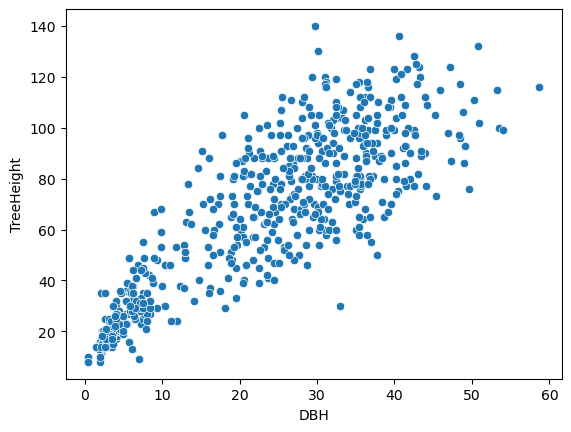

In [17]:
sns.scatterplot(just_ulmus, x = "DBH", y = "TreeHeight")

**Graph 2: Create a scatterplot for just trees in the Ulmus genus with DBH mapped to the x-axis, tree height mapped to the y-axis, and tree species mapped to hue**

Use Seaborn scatterplot again, but add hue = "" to code

<AxesSubplot: xlabel='DBH', ylabel='TreeHeight'>

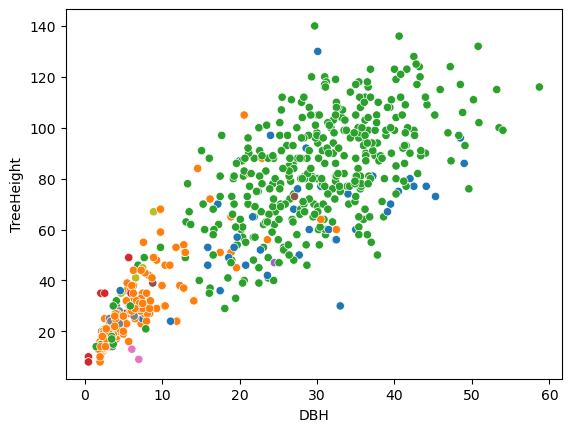

In [18]:
sns.scatterplot(just_ulmus, x = "DBH", y = "TreeHeight", hue = "Genus_spec", legend = False)

**Graph 3: Create a boxplot of DBH for just the Ulmus genus differentiated by species (or, each species 
should have its own boxplot)**

Make a boxplot using Seaborn Boxplot

<AxesSubplot: xlabel='DBH', ylabel='Genus_spec'>

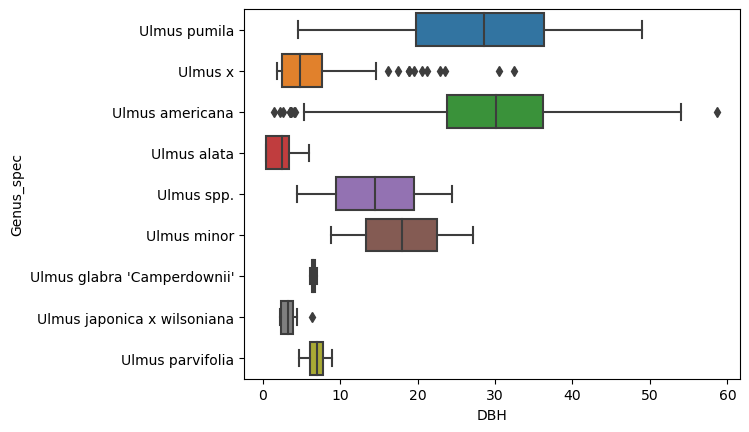

In [19]:
sns.boxplot(data =just_ulmus, x= "DBH", y = "Genus_spec")

**Graph 4:  Combine Graphs 1 and 3 into a single figure**

Add scatterplot points data to the boxplot by adding a stripplot to the graph, to put all the data in one figure.

<AxesSubplot: xlabel='DBH', ylabel='Genus_spec'>

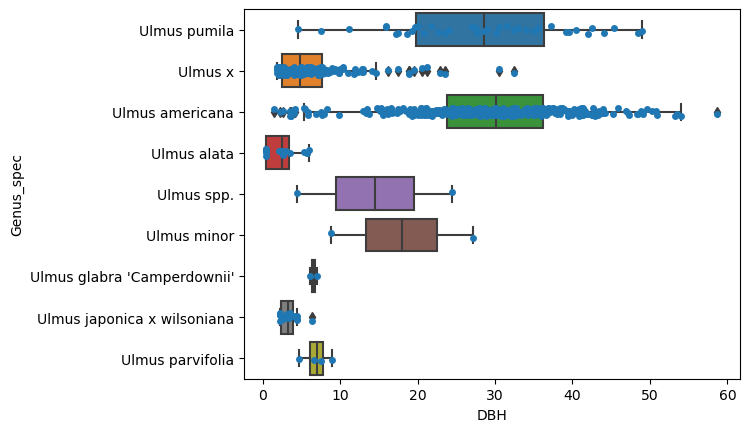

In [29]:
sns.boxplot(data =just_ulmus, x= "DBH", y = "Genus_spec")
sns.stripplot(data =just_ulmus, x= "DBH", y = "Genus_spec")

#### **Part 4: Python Geopandas**

In [ ]:
pip install geopandas fiona shapely pyproj rtree contextily folium matplotlib mapclassify

**Task 1: Read the dataset(shapefile) you download as GeoPandas DataFrame**

In [4]:
import geopandas as gpd
import zipfile
import os
import matplotlib.pyplot as plt
import contextily as ctx

Dataset shows location of wetlands in Scotland

<AxesSubplot: >

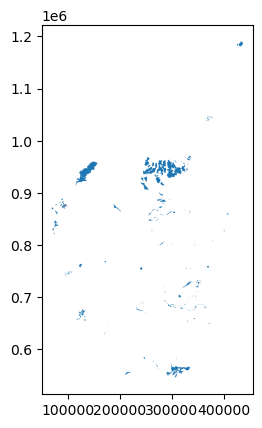

In [5]:
wetland_geo = gpd.read_file('/arcgis/home/RAMSAR_SCOTLAND.shp')
wetland_geo.plot()

In [6]:
wetland_geo.head(4)

NAME  PA_CODE   STATUS EUROPEAN_C  SITE_HA  FEATURE_HA  \
0  Gruinart Flats, Islay     8428  Current    UK13023  3262.13    0.002325   
1  Gruinart Flats, Islay     8428  Current    UK13023  3262.13    0.095200   
2  Gruinart Flats, Islay     8428  Current    UK13023  3262.13    0.020400   
3  Gruinart Flats, Islay     8428  Current    UK13023  3262.13    0.002138   

  MPA_NETWOR GEOGRAPHIC  Shape_Leng  Shape_Area  \
0          Y      MIXED   20.852381      23.250   
1          Y      MIXED  142.694726     952.000   
2          Y      MIXED   63.768535     204.000   
3          Y      MIXED   19.233779      21.375   

                                            geometry  
0  POLYGON ((1.29e+05 6.75e+05, 1.29e+05 6.75e+05...  
1  POLYGON ((1.28e+05 6.75e+05, 1.28e+05 6.75e+05...  
2  POLYGON ((1.29e+05 6.75e+05, 1.29e+05 6.75e+05...  
3  POLYGON ((1.29e+05 6.75e+05, 1.29e+05 6.75e+05...

**Task 2: Use the correct code to plot the first 5 and the last 5 sets of records in your selected dataset.**

<AxesSubplot: >

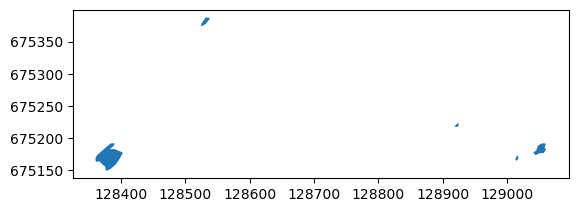

In [13]:
wetland_geo.head(5).plot()

<AxesSubplot: >

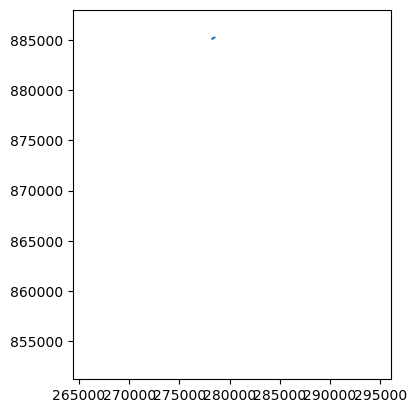

In [14]:
wetland_geo.tail(5).plot()

**Task 3: Create a map where you can explore the selected dataset. Try to plot the map using some categorical attribute. Include a ToolTip.**

In [17]:
import geopandas as gpd
import folium
from folium import Tooltip

Use .explore to plot map, map using categorical attribute 'GEOGRAPHIC'. Tooltip there by default. 

In [ ]:
#wetland dataset mapped by Geographic attribute
wetland_geo.explore(column = 'GEOGRAPHIC', cmap='RdYlBu') #tooltip=True is there by default

**Task 4: What is the CRS?**

Use .crs

In [8]:
print(wetland_geo.crs)

None


**Task 5: How many features are in the dataset?**

Features = rows so print len()

In [13]:
print(len(wetland_geo))

2271


**Task 6: Subset the dataset based on a categorical attribute**

In [12]:
mixed_wetland_geo = wetland_geo[wetland_geo["GEOGRAPHIC"] == "MIXED"]
mixed_wetland_geo.head()

NAME  PA_CODE   STATUS EUROPEAN_C  SITE_HA  FEATURE_HA  \
0  Gruinart Flats, Islay     8428  Current    UK13023  3262.13    0.002325   
1  Gruinart Flats, Islay     8428  Current    UK13023  3262.13    0.095200   
2  Gruinart Flats, Islay     8428  Current    UK13023  3262.13    0.020400   
3  Gruinart Flats, Islay     8428  Current    UK13023  3262.13    0.002138   
4  Gruinart Flats, Islay     8428  Current    UK13023  3262.13    0.008663   

  MPA_NETWOR GEOGRAPHIC  Shape_Leng  Shape_Area  \
0          Y      MIXED   20.852381      23.250   
1          Y      MIXED  142.694726     952.000   
2          Y      MIXED   63.768535     204.000   
3          Y      MIXED   19.233779      21.375   
4          Y      MIXED   42.430854      86.625   

                                            geometry  
0  POLYGON ((1.29e+05 6.75e+05, 1.29e+05 6.75e+05...  
1  POLYGON ((1.28e+05 6.75e+05, 1.28e+05 6.75e+05...  
2  POLYGON ((1.29e+05 6.75e+05, 1.29e+05 6.75e+05...  
3  POLYGON ((1.29e+05 6.75e+05, 1.29e+05 6.75e+05...  
4  POLYGON ((1.29e+05 6.75e+05, 1.29e+05 6.75e+05...

**Task 7: Subset the data based on a numerical attribute**

In [18]:
large_wetland_geo = wetland_geo[wetland_geo["FEATURE_HA"] > 1]
large_wetland_geo.head()

NAME  PA_CODE   STATUS EUROPEAN_C  SITE_HA  \
11   Firth of Tay and Eden Estuary     8425  Current    UK13018  6947.62   
12   Firth of Tay and Eden Estuary     8425  Current    UK13018  6947.62   
17   Firth of Tay and Eden Estuary     8425  Current    UK13018  6947.62   
18   Firth of Tay and Eden Estuary     8425  Current    UK13018  6947.62   
46  North Uist Machair and Islands     8449  Current    UK13050  4702.77   

    FEATURE_HA MPA_NETWOR GEOGRAPHIC    Shape_Leng    Shape_Area  \
11    7.898759          Y      MIXED   1499.470986  7.898759e+04   
12   18.796423          Y      MIXED   3713.789366  1.879642e+05   
17  239.120265          Y      MIXED  41044.674644  2.391203e+06   
18    7.035208          Y      MIXED   1330.551049  7.035208e+04   
46    2.480171          Y      MIXED   1176.465837  2.480171e+04   

                                             geometry  
11  POLYGON ((3.24e+05 7.19e+05, 3.24e+05 7.19e+05...  
12  POLYGON ((3.25e+05 7.2e+05, 3.25e+05 7.2e+05, ...  
17  POLYGON ((3.4e+05 7.26e+05, 3.4e+05 7.26e+05, ...  
18  POLYGON ((3.36e+05 7.27e+05, 3.36e+05 7.27e+05...  
46  POLYGON ((8.77e+04 8.87e+05, 8.77e+04 8.87e+05...

**Task 8: Plot the filtered dataset on a choropleth map**

<AxesSubplot: >

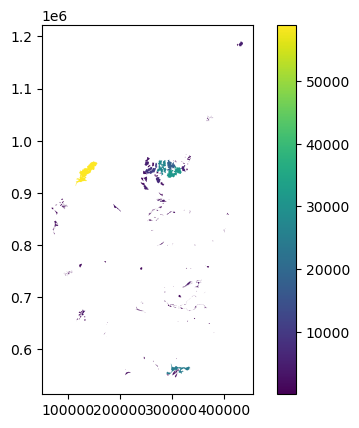

In [22]:
large_wetland_geo.plot(column = "FEATURE_HA", cmap = 'viridis', legend=True)

#### **Part 5: Python Rasterio**

In [ ]:
pip install earthpy rasterio

**Task 1: Read the file as a rasterio dataset**

Use .rio

In [50]:
import rasterio as rio
import matplotlib.pyplot as plt

In [37]:
elev = rio.open('/arcgis/home/elev.tif')

**Task 2: What is the CRS of the dataset?**

Use .crs

In [38]:
print(elev.crs)

EPSG:32617


**Task 3:  Describe the raster dataset regarding the raster extent (bounds), the reference system, and how many bands are in this dataset.**

In [42]:
print(elev.bounds) #raster extent (bounds)
print(elev.crs) #coordinate reference system
print(elev.count) #how many bands

BoundingBox(left=479753.39945587853, bottom=4170823.2037591375, right=668843.3994558785, top=4347733.203759138)
EPSG:32617
1


**Task 4: Create a plot/map of the raster dataset**

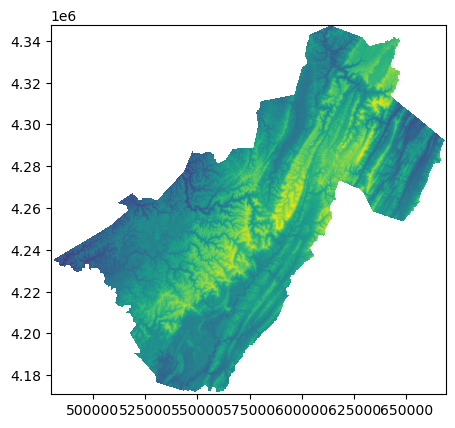

<AxesSubplot: >

In [44]:
from rasterio.plot import show
show(elev)

**Task 5: Create Histograms from the raster**

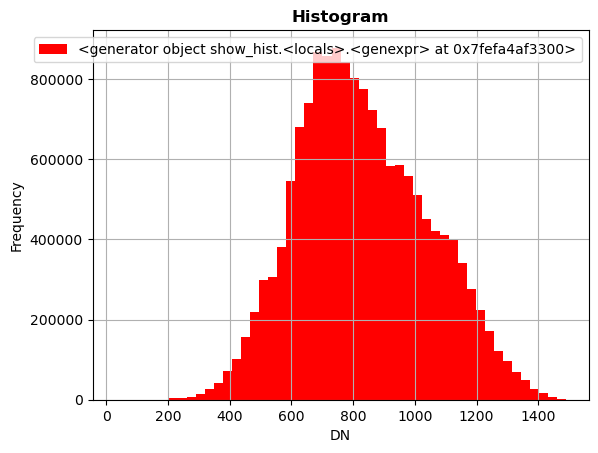

In [55]:
from rasterio.plot import show_hist
show_hist(elev, bins=50)

No clear outliers.